***
< [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/syp-attacks-threats-and-vulnerabilities/blob/main/README.md) >

## CompTIA Security+ - Course Material 2022
###### Topic: ``MAC Flooding and Cloning``
***

Course material for the ``CompTIA Security+`` module of the ``ICT Associate Apprenticeship (Cybersecurity)`` programme.

<a id="top"></a>
***
## Table of Contents
***

### [MAC Flooding and Cloning](#a) <br/><br/>

- [Media Access Control - MAC](#b) <br/><br/>
- [LAN](#c) <br/><br/>
    - [Switching](#c) <br/><br/>
        - [``STP``](#c) <br/><br/>
    - [MAC Address Table](#d) <br/><br/>
        - [Frame Switching](#e) <br/><br/>
    - [MAC Flooding](#f) <br/><br/>
        - [Multi-port Repeater - Hub](#g) <br/><br/>
- [Switch Configurations - Flood Guard](#h) <br/><br/>
    - [Flood Guard](#h) <br/><br/>
- [MAC Cloning | MAC Spoofing](#i) <br/><br/>
    - [DoS](#j) <br/><br/>
    - [Manipulated through Software](#k)
<hr width=50%;>

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="a"></a>
***
### MAC Flooding and Cloning
***

< [Table of Contents](#top) | [References](#references) >
<a id="b"></a>
***
###### Media Access Control - MAC
***

In networking, the term MAC address refers to the Media Access Control address of a network card. 

We often refer to this MAC address as the physical address of the card because every single adapter card has a different MAC address. 

In ethernet, the MAC address is 48 bits long, which is the same as being 6 bytes long, and we write all 6 bytes in hexadecimal - theses 6 bytes are broken up into two sections. 

The first three bytes are the Organizationally Unique Identifier, or OUI. We often refer to this as the manufacturer portion of the MAC address because this particular value has been assigned to a manufacturer, and all of the network interface cards they create will start with the same three bytes. 

The last three bytes of the MAC address are the serial number, and the manufacturer will increment that serial number for every network interface card they manufacture.

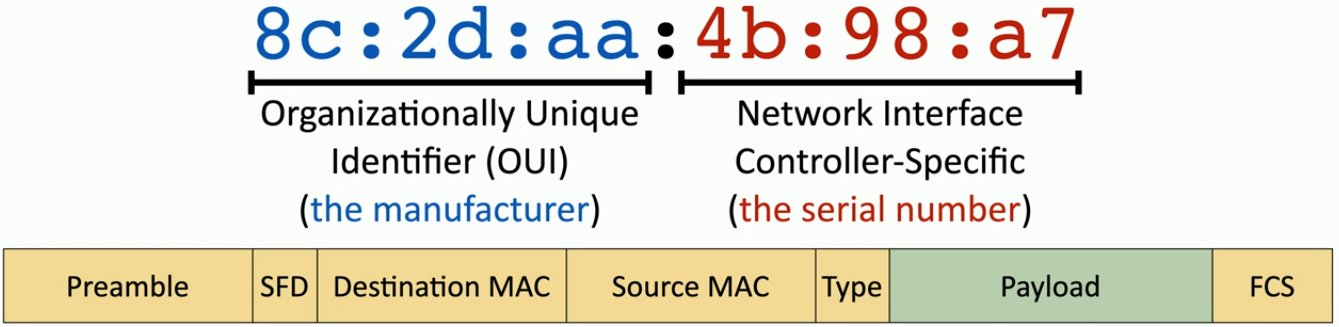

< [Table of Contents](#top) | [References](#references) >
<a id="c"></a>
***
###### LAN Switching | ``STP``
***

The switches that we have on our local area networks are designed to work at this MAC address level - they will interpret what’s in the frame and will forward or drop that traffic between different interfaces on the switch. 

The switch maintains a list of all of the MAC addresses that it knows about on the local network so that it knows when it receives a particular frame where it should be sending that frame as the destination.

Another significant operational requirement for a switch, especially in larger environments, is that the switch maintains a loop-free environment - this keeps the network up and running, and it usually is able to do this by using ``Spanning Tree Protocol``, or ``STP``.

< [Table of Contents](#top) | [References](#references) >
<a id="d"></a>
***
###### MAC Address Table
***

Looking at the process that a switch goes through to maintain its internal MAC address table. 

Have two devices on this network, Sam and the SGC server, and between both of them is a switch. 

Right now, no one has sent any traffic to this switch, and so the MAC address table of the switch is completely empty. 

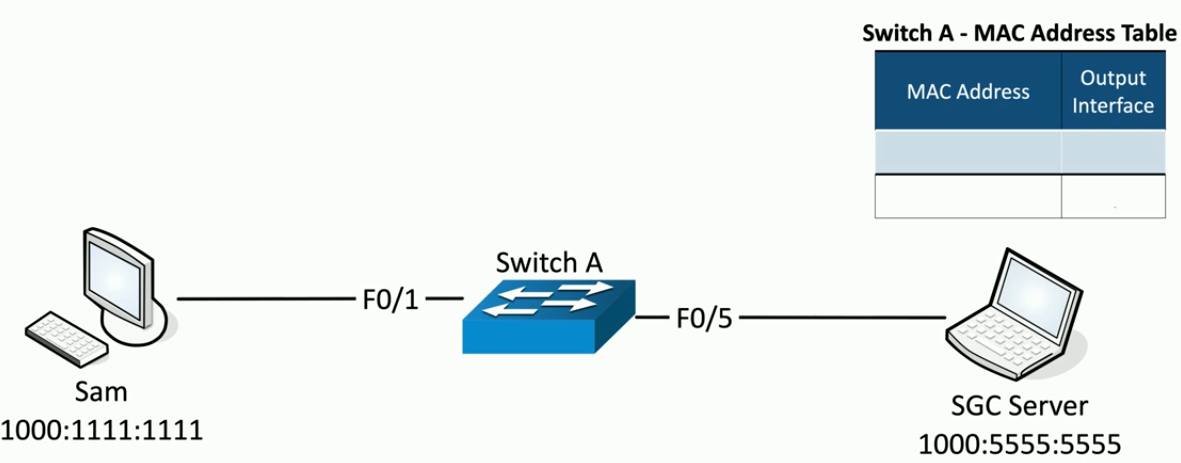

If the switch receives any traffic that is not currently listed in this MAC address table, then it will add that MAC address and the output interface to that table inside the switch.

If ``Sam`` is sending information to the ``SGC Server`` - Sam: MAC address is ``1000:1111:1111:1111`` - SGC Server is ``1000:5555:5555:5555``.

Can see the source MAC and the destination MAC are listed in that frame.

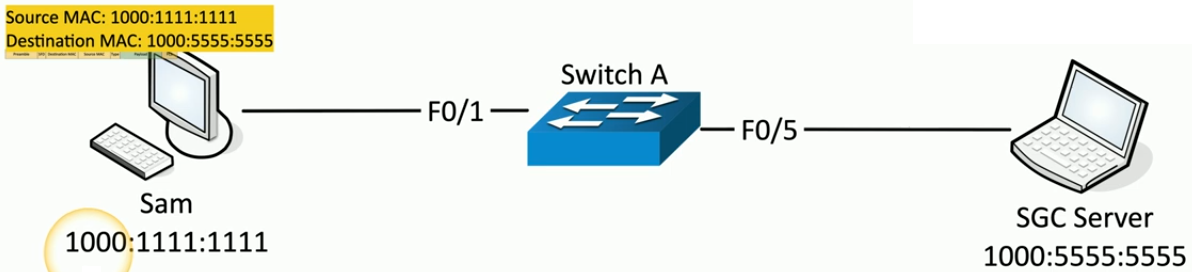

When that frame is received by the switch, the switch notices that the source MAC address is not currently listed in the MAC address table, so it’s going to make a note that anything associated with that MAC address must be located out on interface ``F0/1``. 

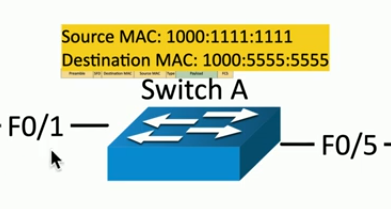

Can see the MAC address table now shows the ``1000:1111:1111:111``, which is Sam’s device, is located on the ``Fast Ethernet 0/1`` interface of the switch.

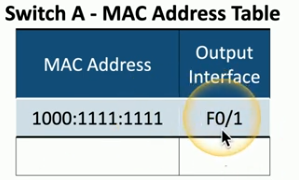

Look and see what happens when traffic goes the other direction. 

The SGC server is going to send information to Sam, so the destination MAC address is ``1000:1111:1111:1111``.

When that frame hits the switch, the switch will compare that destination MAC address to the list of destination MAC addresses that it already has in its table.

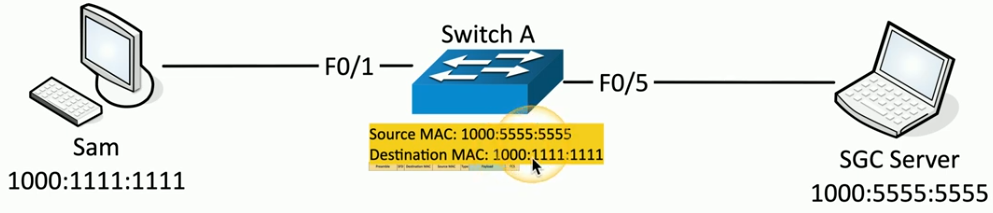

In this particular case, it knows that that MAC address is located on ``Fast Ethernet interface 0/1`` - it then continues to send that traffic on to Sam’s machine out that particular interface and of course, since that SGC server’s MAC address was not added to the switch, the switch also adds that MAC address to the table, and now any traffic destines for Sam’s machine or the SGC server will be properly switched because those MAC addresses are listed in the switch’s MAC address table.

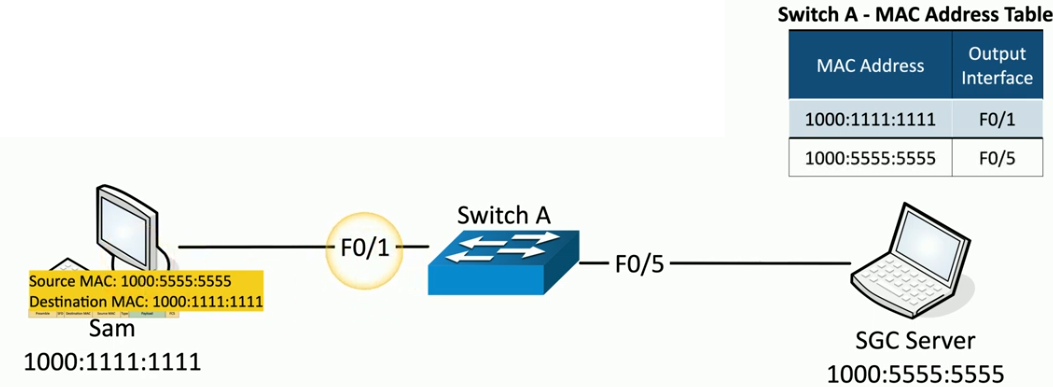

< [Table of Contents](#top) | [References](#references) >
<a id="e"></a>
***
###### Frame Switching
***

This is the process that occurs every time the switch receives a frame and needs to determine where to send that information. 

Even with multiple devices on the network, any time a frame is received, the destination MAC address is evaluated and compared to the existing MAC address table of the switch. 

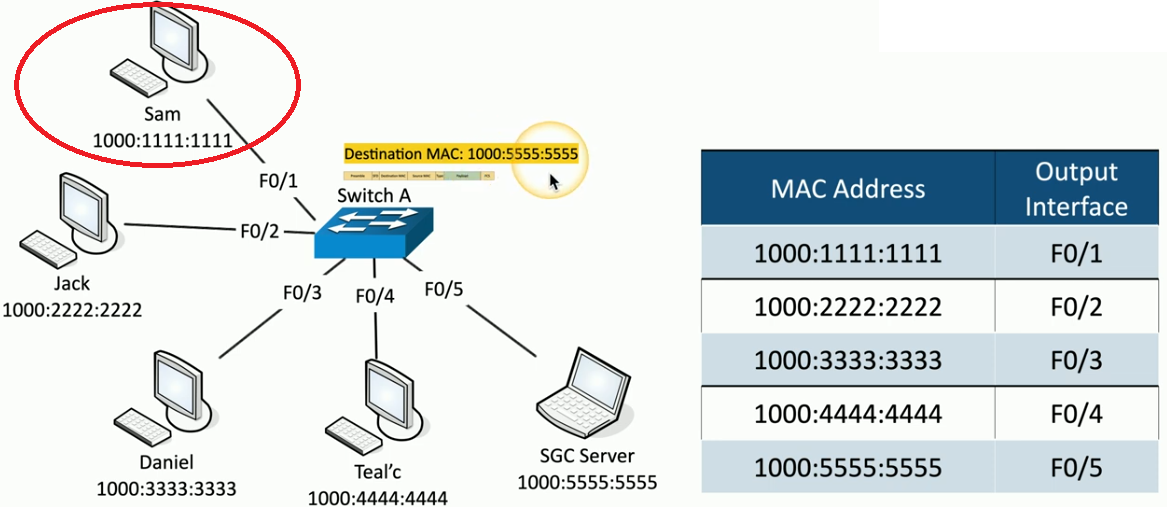

If there is a match, the switch will identify the output interface and then send that particular frame out that specific interface.

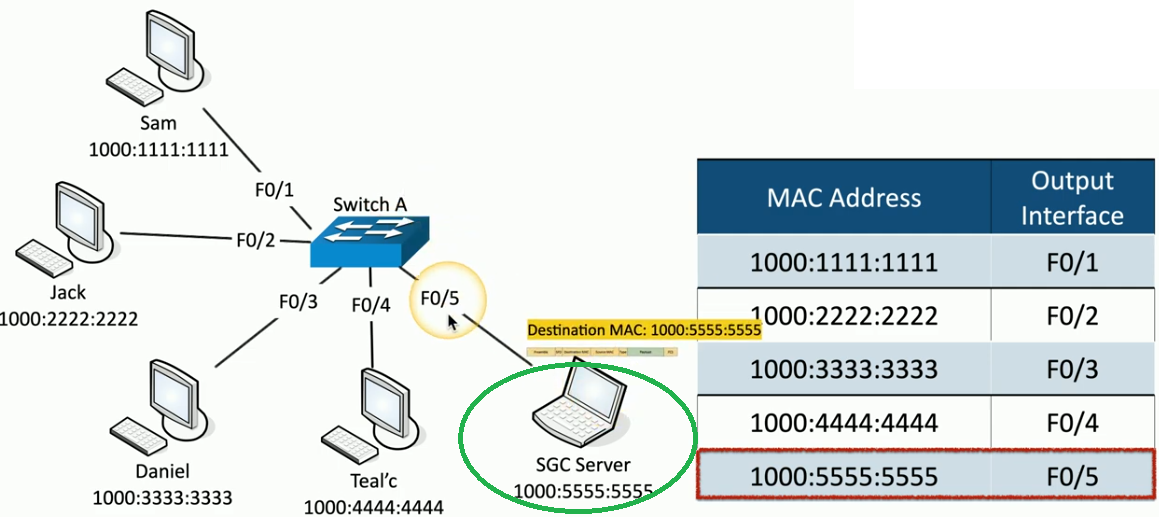

< [Table of Contents](#top) | [References](#references) >
<a id="f"></a>
***
###### MAC Flooding
***

One challenge with this table of MAC addresses is that there’s only so much room in a switch to maintain this list. 

If you look at the specifications for a switch that you’re using, it will tell you how many maximum MAC addresses can be held in that table. 

Attackers know that if there’s a limitation of any kind, they can start taking advantage of that, so one of the things that they might do is start sending traffic with different source MAC addresses to that switch. 

Every time a frame is received by the switch with a MAC address it doesn’t recognize, it will add it into the table and if that switch continues to see thousands and thousands of new MAC addresses, it will continue to add those thousands of new MAC addresses to its MAC address lookup table. 

Eventually, that MAC address table will fill up, it will be at maximum capacity, and the switch will recognize that it’s not able to add any more devices to the table - when this happens, a switch will no longer start directing individual frames, instead, it will start sending every frame to every interface on the switch because it has no idea where those devices might be, and it has no way to store that information in its MAC address table. 

< [Table of Contents](#top) | [References](#references) >
<a id="g"></a>
***
###### Multi-port Repeater - Hub
***

This effectively now means that your switch has turned into a hub. 

It’s now a multiport repeater without any type of intelligence of where a frame may be transmitted to, instead, all frames are sent to all interfaces on the switch.

When this happens, it’s a great opportunity for the attacker to start collecting all of the traffic that’s being transmitted on the network. 

Since some of the information is no longer directed to an individual device and instead is sent to all devices, the attacker can simply start capturing packets and view anything that may be traversing the network. 

< [Table of Contents](#top) | [References](#references) >
<a id="h"></a>
***
###### Switch Configurations - Flood Guard
***

Fortunately, most switches have configuration settings that will look for and protect against this type of MAC flooding. 

It’s often called flood guard or a similar feature, and it restricts one particular interface from sending multiple MAC addresses out over the network and overloading that MAC address table.

< [Table of Contents](#top) | [References](#references) >
<a id="i"></a>
***
###### MAC Cloning | MAC Spoofing
***

Another method than an attacker may use to circumvent existing security devices is to spoof or clone a MAC address - this is when an attacker will modify the MAC address of their device to match the MAC address of a legitimate device that is either on the network or has recently left the network. 

If you’ve ever configured MAC address filters inside of a wireless access point, then you can see how spoofing a MAC address might allow someone to match an existing allow list and gain access to a network that normally they wouldn’t have.

< [Table of Contents](#top) | [References](#references) >
<a id="j"></a>
***
###### DoS
***

This could also be used to create a denial-of-service situation on the network. 

If an attacker is using the same MAC address as someone else, then the switch internal MAC address table may change to send all of the traffic to the attacker instead of the legitimate original user. 

That will certainly create a denial-of-service situation for the user, as the switch switches back and forth and back and forth between where this MAC address might be on the network.

< [Table of Contents](#top) | [References](#references) >
<a id="k"></a>
***
###### Manipulated through Software
***

It’s quite easy to modify the MAC address of a device. 

Usually it’s a burned in address or one that is assigned to the hardware of the network interface card itself, but most network drivers will allow you to modify the MAC address to be anything you’d like it to be. 

This means that it doesn’t take any special software or knowledge to be able to clone or modify a MAC address to match an existing device. 

Fortunately, many switches include features that will look for and block MAC address cloning or MAC address spoofing so that these types of problems don’t occur on your network.

***
## END

< [Table of Contents](#top) >
<a id="references"></a>
***
## References
***

J. "Professor" Messer, "CompTIA Security+ (SY0-601) Course Notes," [professormesser.com](https://web.archive.org/web/20220521181010/https://www.professormesser.com/security-plus/sy0-601/sy0-601-video/sy0-601-comptia-security-plus-course/), September 2021.

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

***
## END

In [1]:
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# END JUPYTER NOTEBOOK